In [1]:
import utils
import numpy as np
from dataset import YOLODataset

Device Selected: mps


In [2]:
import config 

IMAGE_SIZE = config.IMAGE_SIZE
train_dataset = YOLODataset(
    config.DATASET + "/train.csv",
    transform=config.train_transforms,
    S=[IMAGE_SIZE // 32, IMAGE_SIZE // 16, IMAGE_SIZE // 8],
    img_dir=config.IMG_DIR,
    label_dir=config.LABEL_DIR,
    anchors=config.ANCHORS,
    targets=False
)

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_image(image, boxes):
    """Plots predicted bounding boxes on the image"""
    cmap = plt.get_cmap("tab20b")
    class_labels = config.CLASSES
    colors = [cmap(i) for i in np.linspace(0, 1, len(class_labels))]
    im = np.array(image)
    height, width, _ = im.shape

    # Create figure and axes
    fig, ax = plt.subplots(1)
    # Display the image
    ax.imshow(im)

    # box[0] is x midpoint, box[2] is width
    # box[1] is y midpoint, box[3] is height

    for box in boxes:
        assert len(box) == 5, "box should contain class pred, confidence, x, y, width, height"
        class_pred = box[-1]
        box = box[:-1]
        upper_left_x = box[0] - box[2] / 2
        upper_left_y = box[1] - box[3] / 2
        rect = patches.Rectangle(
            (upper_left_x * width, upper_left_y * height),
            box[2] * width,
            box[3] * height,
            linewidth=2,
            edgecolor=colors[int(class_pred)],
            facecolor="none",
        )
        # Add the patch to the Axes
        ax.add_patch(rect)
        plt.text(
            upper_left_x * width,
            upper_left_y * height,
            s=class_labels[int(class_pred)],
            color="white",
            verticalalignment="top",
            bbox={"color": colors[int(class_pred)], "pad": 0},
        )

    plt.show()

In [4]:
exs = iter(train_dataset)

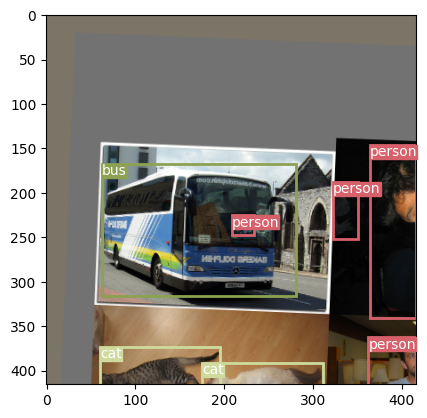

In [8]:
image, bboxes = next(exs)
plot_image(utils.show_transform(image), bboxes)

In [9]:
import random

In [10]:
arr = [1, 2, 3, 4]

In [38]:
random.choices(arr, weights=[0, 0.1, 0.1, 0])

[3]

In [39]:
image.shape

torch.Size([3, 416, 416])